<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Analysing_DataSet/AnalysingDataSet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BoxPlot
### Yeni Veri Seti Hikayesi
* total_bill: yemeğin topla fiyatı (bahşiş e vergi dahil)
* tip: bahşiş
* sex: ücreti ödeyen kişinin cinsiyeti (0 = male, 1 = female)
* smoker: grupta sigra içen kişi varmı (0 = no, 1 = yes)
* day: gün (3 = Thur, 4=Fri,5=Sat,6=Sun)
* time: sabah mı akşammı (0 = day, 1=night)
* size = grupta kaç kişi var

In [ ]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.describe().T

In [ ]:
df["sex"].value_counts()

Ücreti genelde erkekler ödüyormuş, kadınlara daha çok harcatacak duygusal pazarlama yaparsan daah çok kazanırsın.

In [70]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Hafta sonları daha kalabalık oluyor, booking sistemi ve ya haftasonuna özel menüler çıkartarak kar elde edebilirsin. Hafta içide özel menüler çıkartarak müşteri toplayabilirsin.

In [ ]:
df["smoker"].value_counts()

İki tarafında sayısı fazla, sigara içenler için açık bir alan yapılabilir.

In [ ]:
df["time"].value_counts()

### Boxplot Çizme ve Yorumlama

In [ ]:
sns.boxplot(x = df["total_bill"])

Soldaki çizgi min değer, \
mavi kutunun ortası medyan,               
solundaki çizgi %25, \
sağındaki değer %75, \
en sağdaki noktamsı şeyde max değer. Peki neden sağdaki çizgi max değil? \
Çünkü boxplot kendisi aykırı gözlemleri anlayıp senin karşına çıkartabiliyor \
ve böylece sana olması daha iyi olan max değeride gösteriyor.

In [ ]:
sns.boxplot(y = df.total_bill)

### BoxPlot Çaprazlama

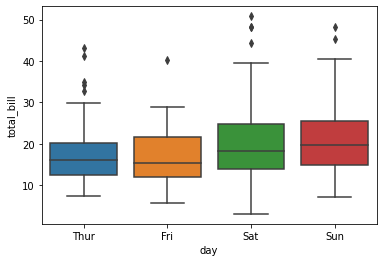

In [69]:
# Hangi günler daha fazla kazanıyoruz?
# df.groupby(["day","total_bill"]).max() # yada
sns.boxplot(x = "day", y = "total_bill", data = df)

Groupby ile hangi günün daha fazla kazandırdığı bilgisine ulaşabilirdik ama box plot ile hem bu bilgiyi hemde aşşağıdaki bilgileri elde edebiliyoruz:  
* median değerlerini aldık,
* dağılımları hakkında bilgi aldık,
* günlerin kendi içindeki aykırı değerleri de aldık
* ayrıca max kazanç getiren gün dışındaki günler hakkında da bilgi aldık. \ 

Kendimizin çıkartabileceği farklı yorumlarda var:
* `df["day"].value_counts()` ile cumartesi günü en çok müşterilerin geldiği gün olmuş fakat boxplota bakınca pazar günü gelen müşteriler daha çok para bırakmış. O zaman pazar günü müşterileri içinde ayrı bir planlama yapılabilir. 


In [72]:
# Sabah mı akşam mı daha çok kazanıyoruz?
df.groupby(["time"]).mean() # fakat görselleştiermek bize daha çok bilgi sağlar?

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


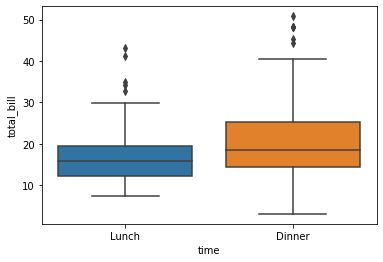

In [73]:
sns.boxplot(x = "time",y = "total_bill", data = df)

In [86]:
# Yemeğe gelen grup sayısı ile ödenen  hesabın miktarı arasında nasıl bir ilişki var?
df.groupby(["size"]).mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


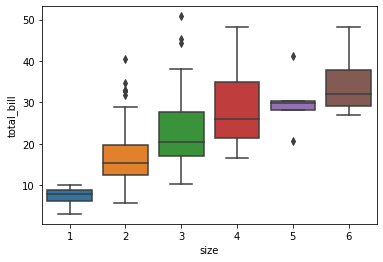

In [88]:
sns.boxplot(x = "size", y = "total_bill", data = df)

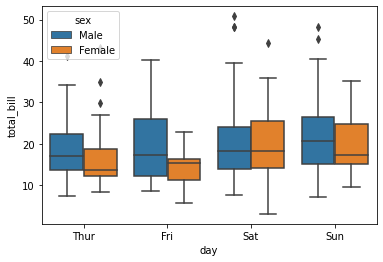

In [89]:
# "günlere" göre hangi "cinsiyet" daha çok hesap "öder"?   => 3 tane boyut var.
sns.boxplot(x= "day", y = "total_bill",hue= "sex", data = df)

Yukarıdaki gibi farklı kırılımlar ekleyerek farklı farklı yorumlarda bulunabiliriz. Kırılım dediği boyut eklemek.

# Violin Grafiği
Yoğunluk grafiği ile kutu grafiğinin kesişimi gibidir.

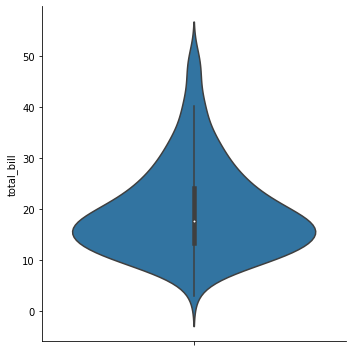

In [91]:
sns.catplot(y = "total_bill", kind="violin", data = df)

### Violin Çaprazlamalar

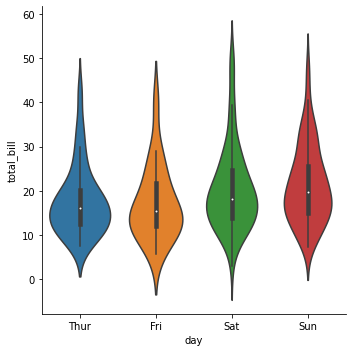

In [94]:
sns.catplot(kind = "violin", data =df,x = "day", y = "total_bill")

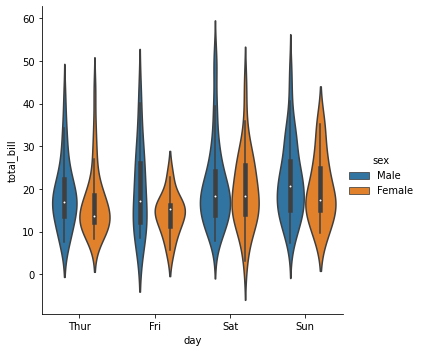

In [95]:
sns.catplot(kind = "violin", data =df,x = "day", y = "total_bill", hue = "sex")

# Korelasyon Grafiği
Korelasyon, değişkenler arası ilişkileri ifade eden itatiksel bir terimdir. \
Elimizdeki veri kategorik ise barplot yani sütun grafikleri kullanmıştık. Sürekli yani nümerik ise de  histogram, yoğunluk, kutu grafiği ve violin grafiklerini kullandık. Bu grafiklerde eklediğimiz 2. 3. değişkenler hep çaprazlama/ kırılım amaçlı boyut değişkenleriydi. Şimdi korelasyon grafiklerinde bir değişken üstüne boyut eklemekten ziyade doğrudan 2 değişken arasında ki ilişkiyi inceleyeceğiz. \
Yani artık tek değişkeni incelemekten çıkıp 2 değişkeni incelemeye başlayacağız!

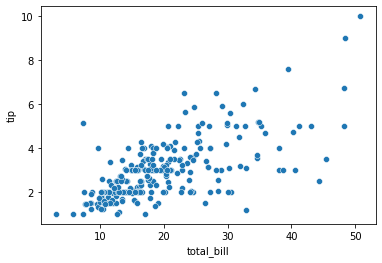

In [96]:
sns.scatterplot(x = "total_bill", y = "tip", data = df)

### Korelasyon Çaprazlamalar

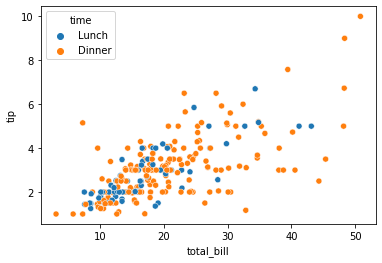

In [97]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df)

"Faturaya göre verilen bahşişe bakıldığında, akşam yemeklerinde verilen bahşiş biraz daha fazla." gibi gibi yorumlar yapabiliriz...

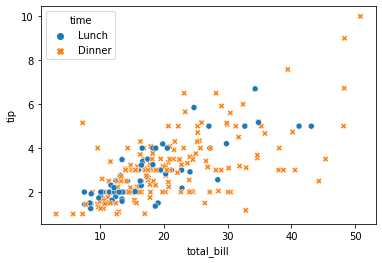

In [99]:
#time'a göre değişim yapmas gerektiğini belirtiyoruz.
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df, style = "time")

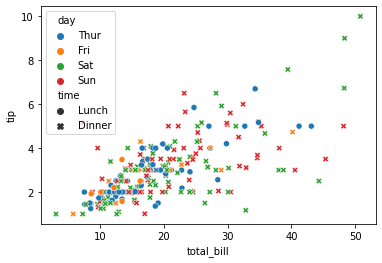

In [100]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", data = df, style = "time")

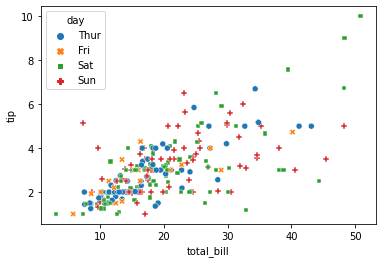

In [101]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", data = df, style = "day")

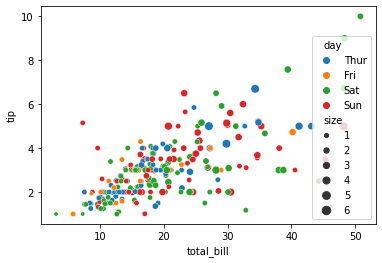

In [102]:
# size ile sayısal bilgi ekleyebiliyoruz, masadaki kişi sayısını ekleyelim.
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", data = df, size = "size")

Grafik çok bilgi veriyor fakat okunabilirlik olarak o kadarda iyi değil. Boyut yanında renklerin yoğunluğ ile de ifade edersek çok daha okunabilir olur. Bunun için hue değişkeni ile size değişkenine aynı attribute'u verirsek istediğimiz sonucu elde etmiş oluruz.

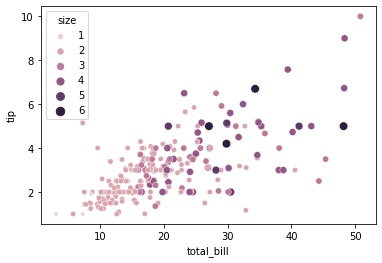

In [103]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", data = df, size = "size")

Yuakrıdaki grafikten gelen faturaya göre verilen bahşişi bulmakla beraber, gruptaki kişi sayısınıda görüp yorum yapabiliyoruz. \
İşte görselleştirme bundan dolayı çok önemli! Sayısal veriler ile yorum yapmak biraz daha zorken, görselleştirildiğimizde daha rahat gözlem yapabiliyor, özellikle de işin içine kırılmalar eklediğimizde inanılmaz yorumlar yapıp geliştirmeler yapabiliyoruz.

# Doğrusal İlişkinin Gösterilmesi

Scatterplot ile iki değişken arasındaki ilişkiyi(korelasyonu) gözlemleyebileceğimizi öğrenmiştik. Scatterplot bize bir dağılım grafiği veriyordu, biz ayrıca doğrusal ilişkilere de bakabiliriz. Doğrusal ilişkilere bakmakta bize gözlem ve yorum yapma açısından ciddi avantajlar sağlaaycak.

In [104]:
import matplotlib.pyplot as plt

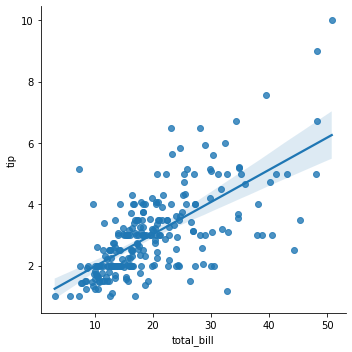

In [105]:
# lmplot() => lineer model plot
sns.lmplot(x = "total_bill", y = "tip",  data = df)

Gördüğün gibi çizgiye yakın olanalr daha koyu renkli iken uzak olanlar daha soluklar. Bunun yapılma sebebi; korelasyon güünü göstertmeye çalışmak. Aynı zamanda çizgiden uzak olanlar standart sapması fazla olanlardır. Bu bize ileride bu soluk renklilerin aykırı gözlem olabileceğini işaret edecektir.

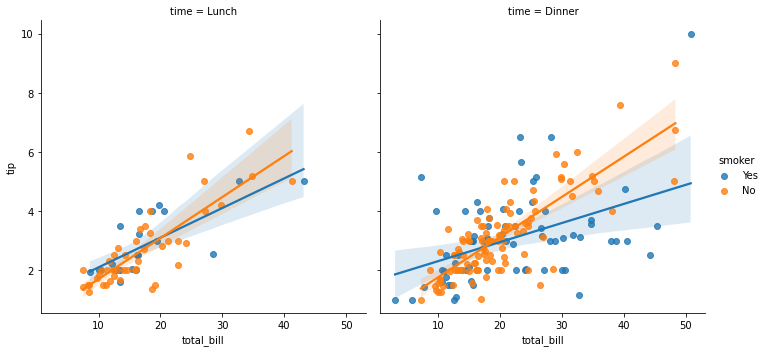

In [107]:
 sns.lmplot(x = "total_bill", y = "tip", data = df, hue = "smoker", col = "time")

Bu iki doğrunun eğimi bizim için önemli. Değerlendirme sonuçları yapacağız gözlediğimiz grafikten. \
Makine verilerden anlam çıkartmaya ve öğrenmeye başlamadan önce bizim öğrenmemiz gerekiyor! Çünkü datasetin gerçek hayata uygunluğunu biz anlayabiliriz. Planets'te demiştikki "number 0 olamaz, olursa yapısal hata olur", bu gibi yapısal hataları makine farkedemeyeceği gibi gündelik hayata uygun olmayan ama grafiklere bakınca mantıklı olan durumları hiç farkdemez. Bu yüzden önce veri setini bizim öğrenmemiz gerekir. \
Ek olarak, gündelik hayata uygun olmayan ama grafiklere bakınca mantıklı olan durumlar için: veri seti değiştirilebilir ya da gözlem miktarı arttırılabilir. Buna ileride geleceğiz.

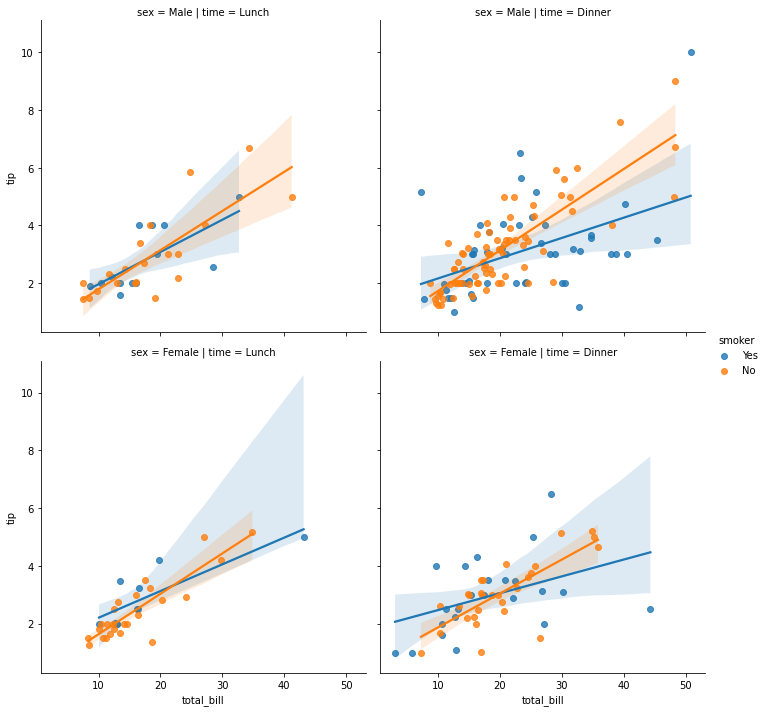

In [108]:
 sns.lmplot(
     x = "total_bill", 
     y = "tip", 
     data = df, 
     hue = "smoker", 
     col = "time",
     row = "sex"
 )

Buradaki incelemeleri Veri Bİlimi için istatistik konu başlığında göreceğiz.